In [22]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df_Sales_data = pd.read_excel("E-commerce_dataset.xlsx", sheet_name="data")

In [24]:
df_Sales_data.head(3)

,Row ID,Order ID,Order Date,Customer ID,Segment,City,State,Country,Country latitude,Country longitude,Region,Market,Subcategory,Category,Product,Quantity,Sales,Discount,Profit
0,46682,IZ-2012-LW699061-40911,2020-01-03,LW-699061,Corporate,Mosul,Ninawa,Iraq,33.223191,43.679291,Western Asia,Asia Pacific,"bath oils, bubbles and soaks",Body care,Head & Shoulders Classic Clean Shampoo,20,600,0.0,300.0
1,10124,US-2012-BT1130518-40912,2020-01-04,BT-1130518,Self-Employed,Pilar,Alagoas,Brazil,-14.235004,-51.925280,South America,LATAM,"bath oils, bubbles and soaks",Body care,Kiehl's Ultra Facial Overnight Hydrating Masque,2,40,0.6,-4.0
2,9067,MX-2012-AW1093031-40912,2020-01-04,AW-1093031,Self-Employed,Santiago de Cuba,Santiago de Cuba,Cuba,21.521757,-77.781167,Caribbean,LATAM,"bath oils, bubbles and soaks",Body care,Golden Vine Bracelet,1,151,0.0,75.5


# Exploratory Data Analysis (EDA)

In [25]:
df_Sales_data.describe()

,Row ID,Order Date,Country latitude,Country longitude,Quantity,Sales,Discount,Profit
count,51290.00000,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,2022-05-11 21:26:49.155780608,24.506298,-4.585665,5.415832,127.074946,0.142908,20.772346
min,1.00000,2020-01-01 00:00:00,-40.900557,-106.346771,1.000000,2.000000,0.000000,-1746.000000
25%,12823.25000,2021-06-19 00:00:00,12.879721,-95.712891,2.000000,25.000000,0.000000,0.000000
50%,25645.50000,2022-07-08 00:00:00,35.861660,2.213749,4.000000,56.000000,0.000000,7.200000
75%,38467.75000,2023-05-22 00:00:00,38.963745,43.679291,7.000000,132.000000,0.200000,25.000000
max,51290.00000,2023-12-31 00:00:00,61.924110,174.885971,20.000000,3940.000000,0.850000,1820.000000
std,14806.29199,NaN,24.119393,80.298692,4.908234,236.074764,0.212280,83.582680


In [26]:
df_Sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Row ID             51290 non-null  int64         
 1   Order ID           51290 non-null  object        
 2   Order Date         51290 non-null  datetime64[ns]
 3   Customer ID        51290 non-null  object        
 4   Segment            51290 non-null  object        
 5   City               51290 non-null  object        
 6   State              51290 non-null  object        
 7   Country            51290 non-null  object        
 8   Country latitude   51290 non-null  float64       
 9   Country longitude  51290 non-null  float64       
 10  Region             51290 non-null  object        
 11  Market             51290 non-null  object        
 12  Subcategory        51290 non-null  object        
 13  Category           51290 non-null  object        
 14  Produc

In [27]:
df_Sales_data.shape

(51290, 19)

In [28]:
df_Sales_data.isnull().sum()

Row ID               0
Order ID             0
Order Date           0
Customer ID          0
Segment              0
City                 0
State                0
Country              0
Country latitude     0
Country longitude    0
Region               0
Market               0
Subcategory          0
Category             0
Product              0
Quantity             0
Sales                0
Discount             0
Profit               0
dtype: int64

In [29]:
df_Sales_data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Customer ID', 'Segment', 'City',
       'State', 'Country', 'Country latitude', 'Country longitude', 'Region',
       'Market', 'Subcategory', 'Category', 'Product', 'Quantity', 'Sales',
       'Discount', 'Profit'],
      dtype='object')

In [30]:
df_Sales_data.head(1)

,Row ID,Order ID,Order Date,Customer ID,Segment,City,State,Country,Country latitude,Country longitude,Region,Market,Subcategory,Category,Product,Quantity,Sales,Discount,Profit
0,46682,IZ-2012-LW699061-40911,2020-01-03,LW-699061,Corporate,Mosul,Ninawa,Iraq,33.223191,43.679291,Western Asia,Asia Pacific,"bath oils, bubbles and soaks",Body care,Head & Shoulders Classic Clean Shampoo,20,600,0.0,300.0


**_____________________________________________________________________________________________________________________________________________________**

# Data Preparation

In [31]:
df_Sales_data.drop(['Country latitude', 'Country longitude'], axis=1, inplace=True)


In [32]:
df_Sales_data['Price'] =df_Sales_data['Sales'] / df_Sales_data['Quantity']
# df_Sales_data.head(1)

In [33]:
df_Sales_data['Month'] = pd.to_datetime(df_Sales_data['Order Date']).dt.month_name()
df_Sales_data.head(3)

,Row ID,Order ID,Order Date,Customer ID,Segment,City,State,Country,Region,Market,Subcategory,Category,Product,Quantity,Sales,Discount,Profit,Price,Month
0,46682,IZ-2012-LW699061-40911,2020-01-03,LW-699061,Corporate,Mosul,Ninawa,Iraq,Western Asia,Asia Pacific,"bath oils, bubbles and soaks",Body care,Head & Shoulders Classic Clean Shampoo,20,600,0.0,300.0,30.0,January
1,10124,US-2012-BT1130518-40912,2020-01-04,BT-1130518,Self-Employed,Pilar,Alagoas,Brazil,South America,LATAM,"bath oils, bubbles and soaks",Body care,Kiehl's Ultra Facial Overnight Hydrating Masque,2,40,0.6,-4.0,20.0,January
2,9067,MX-2012-AW1093031-40912,2020-01-04,AW-1093031,Self-Employed,Santiago de Cuba,Santiago de Cuba,Cuba,Caribbean,LATAM,"bath oils, bubbles and soaks",Body care,Golden Vine Bracelet,1,151,0.0,75.5,151.0,January


**_____________________________________________________________________________________________________________________________________________________**

# Regional Sales by Category

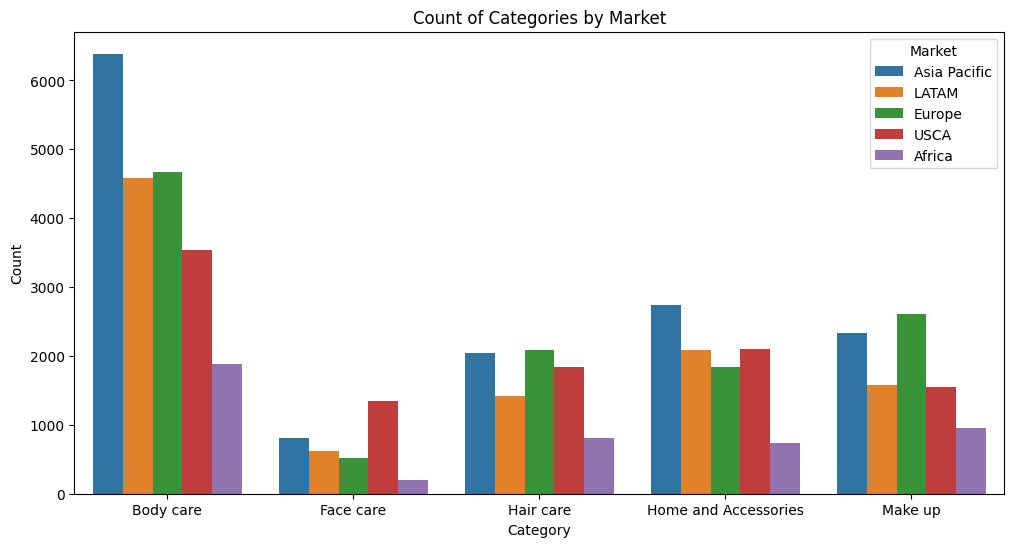

In [34]:
#Depand of categories over market barplot
plt.figure(figsize=(12, 6))
sns.countplot(data=df_Sales_data, x='Category', hue='Market')
plt.title('Count of Categories by Market')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Market')
plt.show()

# df_Sales_data_Total_category = df_Sales_data.groupby("Category")["Market"].value_counts()
# print(df_Sales_data_Total_category)

# Insights
1. Body Care: Sold the most in Asia Pacific (6,388).
2. Face Care: Sold the most in USCA (1,341).
3. Hair Care: Sold the most in Europe (2,091).
4. Home & Accessories: Sold the most in Asia Pacific (2,737).
5. Makeup: Sold the most in Europe (2,602).

**_____________________________________________________________________________________________________________________________________________________**

# Sales Trends

C:\Users\Aditya Deepak Patil\AppData\Local\Temp\ipykernel_17564\291029918.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette="viridis")


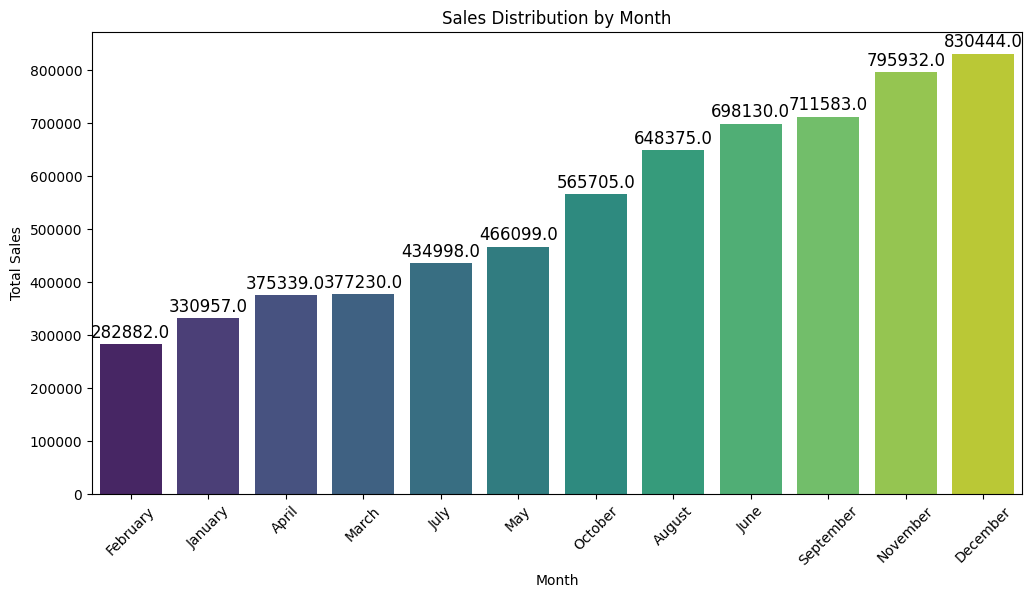

In [35]:
# Aggregate sales by month
monthly_sales = df_Sales_data.groupby("Month")["Sales"].sum().sort_values()

# plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette="viridis")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Sales Distribution by Month")
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.show()

# Insights
1. Highest sales months: December (~830,000), November (~790,000), and September (~710,000).
2. Lowest sales months: February (~280,000), January (~330,000), and April (~370,000).

**_____________________________________________________________________________________________________________________________________________________**

# Monthly Sales & Profit

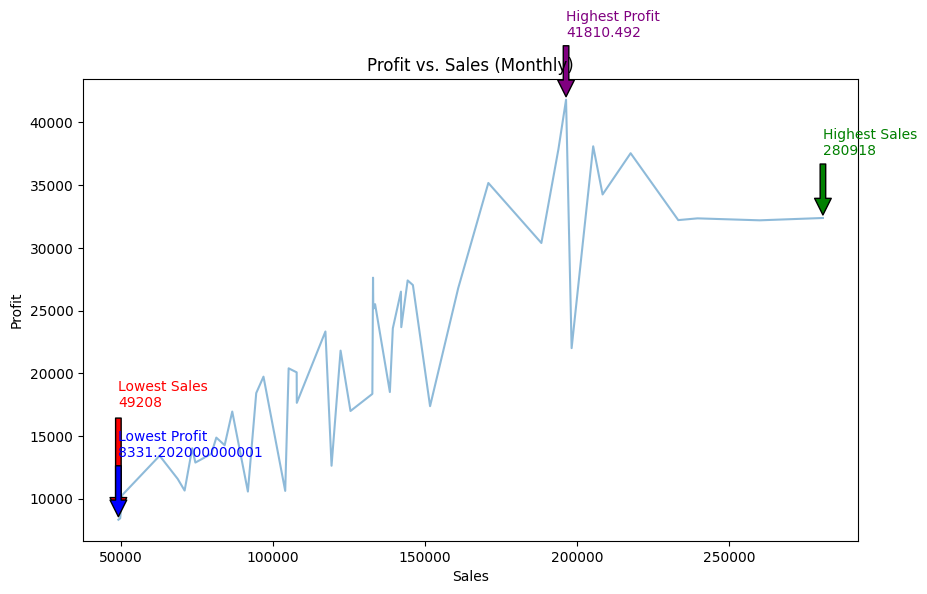

In [36]:
df_Sales_data['Month'] = df_Sales_data['Order Date'].dt.to_period('M')

# Aggregate data by year
yearly_data = df_Sales_data.groupby('Month')[['Sales', 'Profit']].sum().reset_index()

min_sales = yearly_data['Sales'].min()
max_sales = yearly_data['Sales'].max()
min_profit = yearly_data['Profit'].min()
max_profit = yearly_data['Profit'].max()

# print(f"Lowest Sales: {min_sales}")
# print(f"Highest Sales: {max_sales}")
# print(f"Lowest Profit: {min_profit}")
# print(f"Highest Profit: {max_profit}")

# Profit vs. Sales Scatter Plot (Yearly)
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_data, x="Sales", y="Profit", alpha=0.5)
plt.title("Profit vs. Sales (Monthly)")
plt.xlabel("Sales")
plt.ylabel("Profit")

# Annotate the lowest and highest values
plt.annotate(f'Lowest Sales\n{min_sales}', xy=(min_sales, yearly_data[yearly_data['Sales'] == min_sales]['Profit'].values[0]), 
             xytext=(min_sales, yearly_data[yearly_data['Sales'] == min_sales]['Profit'].values[0] + 9000),
             arrowprops=dict(facecolor='red', shrink=0.05), fontsize=10, color='red')

plt.annotate(f'Highest Sales\n{max_sales}', xy=(max_sales, yearly_data[yearly_data['Sales'] == max_sales]['Profit'].values[0]), 
             xytext=(max_sales, yearly_data[yearly_data['Sales'] == max_sales]['Profit'].values[0] + 5000),
             arrowprops=dict(facecolor='green', shrink=0.05), fontsize=10, color='green')

plt.annotate(f'Lowest Profit\n{min_profit}', xy=(yearly_data[yearly_data['Profit'] == min_profit]['Sales'].values[0], min_profit), 
             xytext=(yearly_data[yearly_data['Profit'] == min_profit]['Sales'].values[0], min_profit + 5000),
             arrowprops=dict(facecolor='blue', shrink=0.05), fontsize=10, color='blue')

plt.annotate(f'Highest Profit\n{max_profit}', xy=(yearly_data[yearly_data['Profit'] == max_profit]['Sales'].values[0], max_profit), 
             xytext=(yearly_data[yearly_data['Profit'] == max_profit]['Sales'].values[0], max_profit + 5000),
             arrowprops=dict(facecolor='purple', shrink=0.05), fontsize=10, color='purple')

plt.show()

# Insights
1. Lowest monthly sales: 49,200
2. Highest monthly sales: 280,900
3. Lowest monthly profit: 8,330
4. Highest monthly profit: 41,800

**_____________________________________________________________________________________________________________________________________________________**

# Top 10 Best-Selling Products

C:\Users\Aditya Deepak Patil\AppData\Local\Temp\ipykernel_17564\4081552010.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="coolwarm")


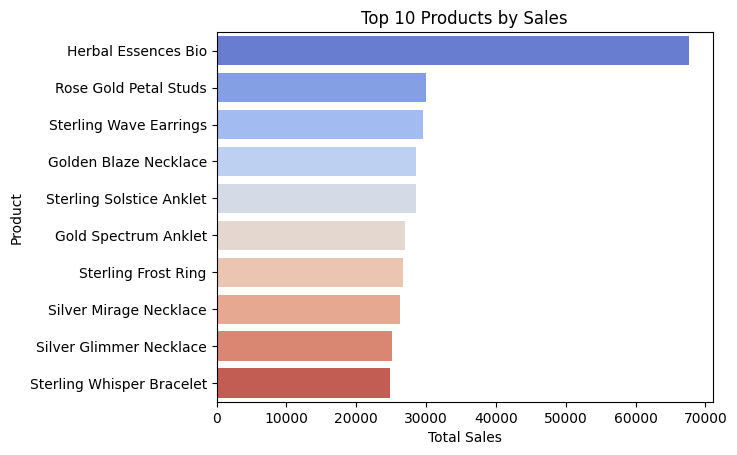

In [37]:
#Top 10 Products by Sales
top_products = df_Sales_data.groupby("Product")["Sales"].sum().nlargest(10)
sns.barplot(x=top_products.values, y=top_products.index, palette="coolwarm")
plt.title("Top 10 Products by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Product")
plt.show()

# print(top_products)

# Insights
**Top 3 Products**
1. Herbal Essences Bio (~67,600 sales)
2. Rose Gold Petal Studs (~29,900 sales)
3. Sterling Wave Earrings (~29,500 sales)

**_____________________________________________________________________________________________________________________________________________________**

# Market & Segment Insights

C:\Users\Aditya Deepak Patil\AppData\Local\Temp\ipykernel_17564\1228673589.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=market_sales.index, x=market_sales.values, palette="magma")


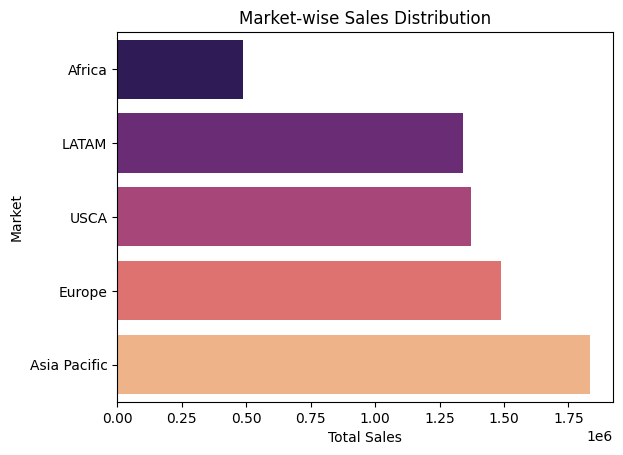

In [38]:
#Market-wise Sales Distribution
market_sales = df_Sales_data.groupby("Market")["Sales"].sum().sort_values()
sns.barplot(y=market_sales.index, x=market_sales.values, palette="magma")
plt.title("Market-wise Sales Distribution")
plt.xlabel("Total Sales")
plt.ylabel("Market")
plt.show()

C:\Users\Aditya Deepak Patil\AppData\Local\Temp\ipykernel_17564\1304082512.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_sales.index, x=category_sales.values, palette="pastel")


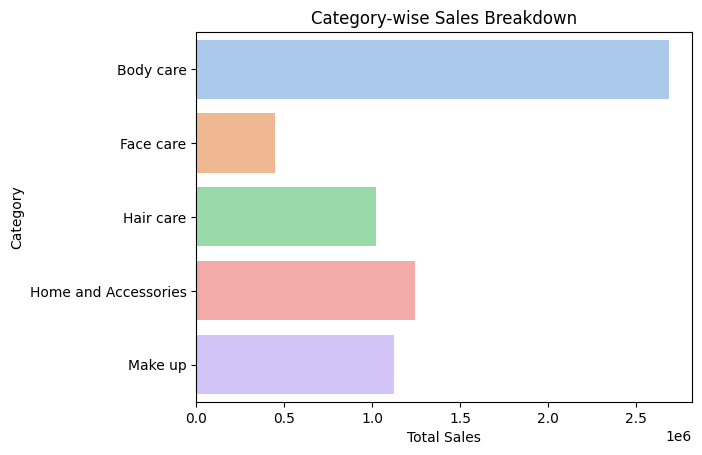

In [39]:
#Category-wise Sales Breakdown
category_sales = df_Sales_data.groupby("Category")["Sales"].sum()
sns.barplot(y=category_sales.index, x=category_sales.values, palette="pastel")
plt.title("Category-wise Sales Breakdown")
plt.xlabel("Total Sales")
plt.ylabel("Category")
plt.show()

# print(category_sales)

C:\Users\Aditya Deepak Patil\AppData\Local\Temp\ipykernel_17564\1392992771.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=segment_sales.index, x=segment_sales.values, palette="cubehelix")


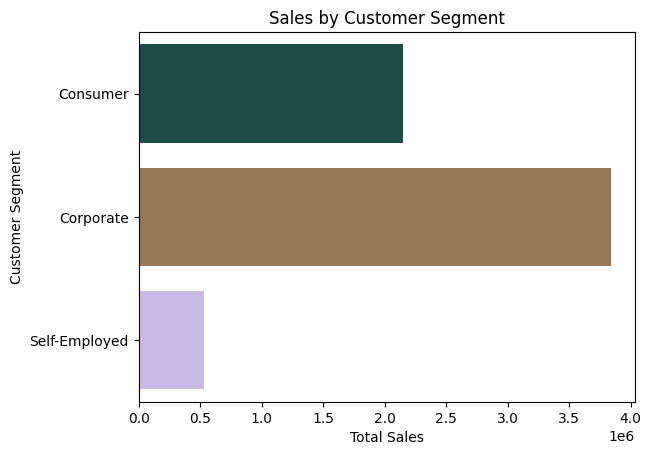

In [40]:
#Sales by Customer Segment
segment_sales = df_Sales_data.groupby("Segment")["Sales"].sum()
sns.barplot(y=segment_sales.index, x=segment_sales.values, palette="cubehelix")
plt.title("Sales by Customer Segment")
plt.xlabel("Total Sales")
plt.ylabel("Customer Segment")
plt.show()

C:\Users\Aditya Deepak Patil\AppData\Local\Temp\ipykernel_17564\147353791.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_countries.index, x=top_countries.values, palette="coolwarm")


Text(0, 0.5, 'Country')

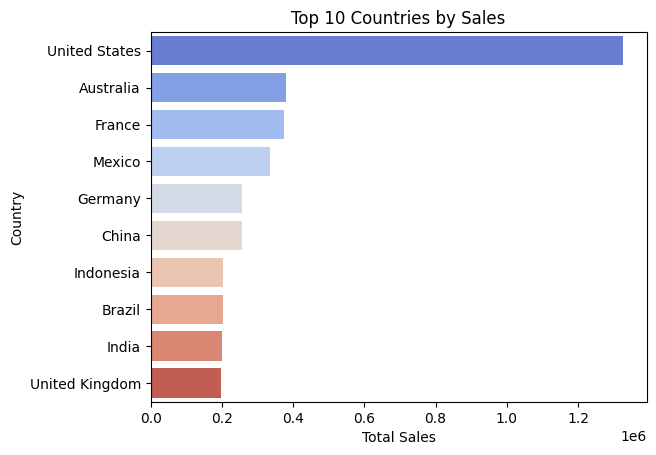

In [41]:
#Top 10 Countries by Total Sales
top_countries = df_Sales_data.groupby("Country")["Sales"].sum().nlargest(10)
sns.barplot(y=top_countries.index, x=top_countries.values, palette="coolwarm")
plt.title("Top 10 Countries by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Country")

# Insights
1. Most sales were made in the Asia Pacific and European markets.
2. Body Care and Home & Accessories categories had the highest sales.
3. The Corporate segment generated the most sales.
4. United States, Australia, and France had the highest sales rates.

**_____________________________________________________________________________________________________________________________________________________**

# Sales and Profit Trends Over Time

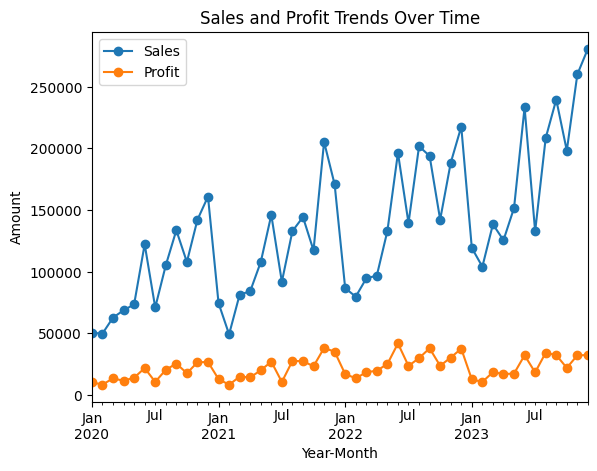

In [42]:

#Sales and Profit Trends Over Time
df_Sales_data["Year-Month"] = df_Sales_data["Order Date"].dt.to_period("M")
monthly_trends = df_Sales_data.groupby("Year-Month")[["Sales", "Profit"]].sum()
monthly_trends.plot(kind="line", marker="o")
plt.title("Sales and Profit Trends Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Amount")
plt.show()

# print(monthly_trends)

**Sales Growth:**
1. There is a noticeable upward trend in sales over time, with fluctuations but an overall strong increase.
2. Sales exhibit seasonal or cyclical spikes, possibly due to high-demand periods.


**Profit Trends:**
1. Profit also shows an upward trend but at a much lower magnitude compared to sales.
2. The gap between sales and profit suggests that while revenue is increasing, profit margins may not be improving proportionally.